In [ ]:

#originall from https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import keras; 
print keras.__version__

Using TensorFlow backend.


1.2.2


In [16]:
from keras import backend as K
import os

#https://keras.io/backend/

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        K.set_image_dim_ordering('th')
        reload(K)
        assert K.backend() == backend

set_keras_backend("theano")
#set_keras_backend("tensorflow")#keep this for reference.
#set_keras_backend("cntk")#error

'''
nb: environment setup notes!!!
nb: OverflowError: Range exceeds valid bounds refer github 
#https://github.com/fchollet/keras/issues/2681
check your ~/.keras/keras.json
if "image_dim_ordering": is "th" and "backend": "theano", your input_shape must be (channels, height, width)
if "image_dim_ordering": is "tf" and "backend": "tensorflow", your input_shape must be (height, width, channels)
'''


'\nnb: OverflowError: Range exceeds valid bounds refer github \n#https://github.com/fchollet/keras/issues/2681\ncheck your ~/.keras/keras.json\nif "image_dim_ordering": is "th" and "backend": "theano", your input_shape must be (channels, height, width)\nif "image_dim_ordering": is "tf" and "backend": "tensorflow", your input_shape must be (height, width, channels)\n'

In [17]:
import numpy as np
np.random.seed(123)
from datetime import datetime

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [5]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (type(X_train), X_train.shape)
print (type(y_train), y_train.shape)
print (type(X_test), X_test.shape)
print (type(y_test), y_test.shape)

(<type 'numpy.ndarray'>, (60000, 28, 28))
(<type 'numpy.ndarray'>, (60000,))
(<type 'numpy.ndarray'>, (10000, 28, 28))
(<type 'numpy.ndarray'>, (10000,))


In [6]:
print (y_train[0:10])
print (y_test[0:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


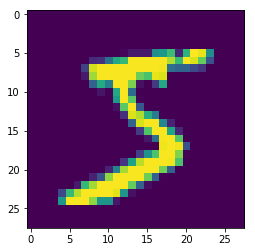

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[0])

In [8]:
#reshaping due to images being 28x28 not 3x28x28
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
#ie changed from (60000, 28, 28) to (60000, 1, 28, 28))
print (type(X_train), X_train.shape)
print (type(X_test), X_test.shape)


(<type 'numpy.ndarray'>, (60000, 1, 28, 28))
(<type 'numpy.ndarray'>, (10000, 1, 28, 28))


In [9]:
#convert data from int to float and normalise data to range (0,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
#convert into to oneshot style vector w values of 0 or 1.
print ("before reshape")
print (y_train.shape)
print (y_train[0:3])
print (y_test[0:3])

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print ("after reshape")
print (Y_train[0:3])
print (Y_test[0:3])


before reshape
(60000,)
[5 0 4]
[7 2 1]
after reshape
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [11]:
model = Sequential()
print (type(model), type(model.layers), len(model.layers))
##print model.output_shape #AttributeError: The layer has never been called and thus has no defined output shape.

(<class 'keras.models.Sequential'>, <type 'list'>, 0)


In [12]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
#https://faroit.github.io/keras-docs/1.2.2/layers/convolutional/#convolution2d


#1,28,28 corresponds to the 28x28 greyscale images - 1 for greyscale vs 3 for RGB (color)

print (type(model), type(model.layers), len(model.layers), type(model.layers[0]))
print model.output_shape

#why is ouput (None, -1, 26, 32), was expecting 

(<class 'keras.models.Sequential'>, <type 'list'>, 1, <class 'keras.layers.convolutional.Convolution2D'>)
(None, 32, 26, 26)


In [13]:
#https://keras.io/layers/convolutional/
#

model.add(Convolution2D(32, 3, 3, activation='relu'))
print (type(model), type(model.layers), len(model.layers))
print model.output_shape

model.add(MaxPooling2D(pool_size=(2,2)))
print (type(model), type(model.layers), len(model.layers))
print model.output_shape

model.add(Dropout(0.25))

(<class 'keras.models.Sequential'>, <type 'list'>, 2)
(None, 32, 24, 24)
(<class 'keras.models.Sequential'>, <type 'list'>, 3)
(None, 32, 12, 12)


In [14]:
print (type(model), type(model.layers), len(model.layers))
print (type(model.layers[0]))
print (type(model.layers[1]))
print (type(model.layers[2]))
print (type(model.layers[3]))
print model.output_shape

(<class 'keras.models.Sequential'>, <type 'list'>, 4)
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.core.Dropout'>
(None, 32, 12, 12)


In [15]:
model.add(Flatten())
print ("after add(Flatten...")
print (type(model), type(model.layers), len(model.layers))
print model.output_shape

model.add(Dense(128, activation='relu'))
print ("after add(Dense(128, activation='relu'...")
print (type(model), type(model.layers), len(model.layers))
print model.output_shape

model.add(Dropout(0.5))
print ("after add(Dropout(0.5)...")
print (type(model), type(model.layers), len(model.layers))
print model.output_shape

model.add(Dense(10, activation='softmax'))
print ("after add(Dense(10, activation='softmax...")
print (type(model), type(model.layers), len(model.layers))
print model.output_shape


after add(Flatten...
(<class 'keras.models.Sequential'>, <type 'list'>, 5)
(None, 4608)
after add(Dense(128, activation='relu'...
(<class 'keras.models.Sequential'>, <type 'list'>, 6)
(None, 128)
after add(Dropout(0.5)...
(<class 'keras.models.Sequential'>, <type 'list'>, 7)
(None, 128)
after add(Dense(10, activation='softmax...
(<class 'keras.models.Sequential'>, <type 'list'>, 8)
(None, 10)


In [18]:
startTime= datetime.now()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))
#subsecond runtime

Time elpased (hh:mm:ss.ms) 0:00:00.013364


In [19]:
startTime= datetime.now()
print ("start")
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))
# 10 epochs x 25s ea = 250s
#takes approx 5'5" to run on AWS p2.xlarge

Epoch 1/10
60000/60000 [==============================] - 25s - loss: 0.2133 - acc: 0.9350    
Epoch 2/10
60000/60000 [==============================] - 25s - loss: 0.0906 - acc: 0.9730    
Epoch 3/10
60000/60000 [==============================] - 25s - loss: 0.0679 - acc: 0.9796    
Epoch 4/10
60000/60000 [==============================] - 26s - loss: 0.0559 - acc: 0.9833    
Epoch 5/10
60000/60000 [==============================] - 25s - loss: 0.0482 - acc: 0.9850    
Epoch 6/10
60000/60000 [==============================] - 26s - loss: 0.0429 - acc: 0.9865    
Epoch 7/10
60000/60000 [==============================] - 26s - loss: 0.0391 - acc: 0.9877    
Epoch 8/10
60000/60000 [==============================] - 25s - loss: 0.0357 - acc: 0.9889    
Epoch 9/10
60000/60000 [==============================] - 25s - loss: 0.0311 - acc: 0.9900    
Epoch 10/10
60000/60000 [==============================] - 26s - loss: 0.0289 - acc: 0.9904    
Time elpased (hh:mm:ss.ms) 0:05:05.157965


In [20]:
startTime= datetime.now()
print ("start")
score = model.evaluate(X_test, Y_test, verbose=0)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))


start
Time elpased (hh:mm:ss.ms) 0:00:08.279229


In [24]:
print (type(score), len(score), type(score[0]), type(score[1]), score)
#NB: accuracy during training was 0.9904 vs accuracy on test = 0.99099. Not overfitted = good.

(<type 'list'>, 2, <type 'numpy.float64'>, <type 'numpy.float64'>, [0.0334687551842816, 0.99099999999999999])


In [25]:
print (type(model))

<class 'keras.models.Sequential'>


In [26]:
print (type(X_test), X_test.shape)

(<type 'numpy.ndarray'>, (10000, 1, 28, 28))


In [28]:
startTime= datetime.now()
print ("start")
pred = model.predict(X_test, batch_size = 32, verbose = 0)
timeElapsed=datetime.now()-startTime
print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))
print (type(pred), pred.shape)

#runtime ~2 seconds

start
Time elpased (hh:mm:ss.ms) 0:00:01.687737
(<type 'numpy.ndarray'>, (10000, 10))


In [30]:
pred[0,:]

array([  1.87778254e-17,   7.31818772e-10,   4.47629919e-11,
         1.74847781e-09,   7.30151086e-18,   5.17064656e-15,
         2.43934302e-20,   1.00000000e+00,   8.70400733e-16,
         1.51805964e-11], dtype=float32)

In [35]:
pred_class = np.argmax(pred,axis=-1)
#nb: this is just finding the max prediction. 

print type(y_test), y_test.shape
print type(pred_class), pred_class.shape
print pred_class[0:20]
print y_test[0:20]

<type 'numpy.ndarray'> (10000,)
<type 'numpy.ndarray'> (10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [37]:
match = 0.
for i in range(0, y_test.shape[0]):
    if y_test[i]==pred_class[i]:
        match +=1
accuracy = match/y_test.shape[0]
print accuracy

0.991
